# TP6 : Amélioration du score du MLPClassifieur

### importation des bibliotheques necéssaires ainsi que la dataset.

In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("traaaaaaaaaaiiin.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Extraction des caracteristiques

In [7]:
data=data.drop(["Name","Ticket","Cabin"], axis=1)

* nous avons supprimer la colonne name puisqu' on a toutes les informations neccessaire qu'on peut extraire de cette   derniere  dans la collone sex et on a fait la  meme chose pour la colone ticket puisq'il importe la  meme     information que la colonne classe 

#### encodages de la colonne Sex

In [9]:
data["Sex"].replace({"male": 0, "female": 1}, inplace=True)

#### Suprimmer les valeurs manquantes 

In [8]:
data=data.dropna()

In [11]:
data["Embarked"].isna().sum()

0

In [10]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,Q
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
889,890,1,1,0,26.0,0,0,30.0000,C


#### data apres l'affichage

In [12]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,Q
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [13]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

### encodages de la colonne Embarked

In [14]:
data["Embarked"].replace({"S": 0, "Q": 1,"C": 2}, inplace=True)

In [15]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,1
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
889,890,1,1,0,26.0,0,0,30.0000,2


In [16]:
data["Embarked"].unique()

array([0, 2, 1], dtype=int64)

### Affichage de la matrice de confusion

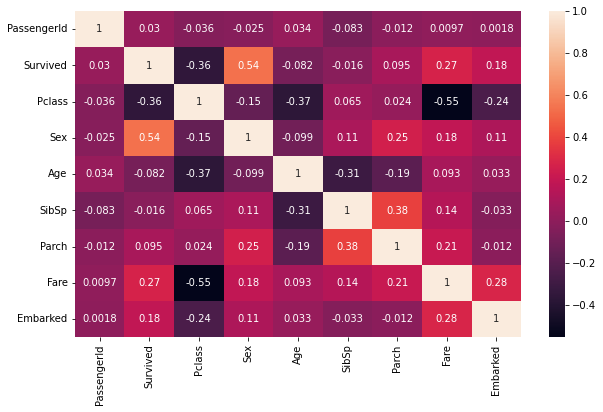

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
 
correlation_mat = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_mat, annot = True)
plt.show()

- Nous avons des valeur de correlation entre les variable inferieur a 0.5 ce qui signifie , qu'on a garder que les variables interessantes et qui importent pas les memes informations 

## Traitement :

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [19]:
X=data.drop("Survived" , axis=1)
y=data["Survived"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### LA normalisation des données

In [21]:
#Le processus de normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Génération de 5 architechtures de différents nombre de couches cachées et de nombre de neurones contenant chacune d'eux

In [22]:
import random
import time
new_one=[x for x in range(10,251)]
hidden_layer_sizes=[]
dict2={}
for i in range (1,6):
    hidden_layer_sizes=[]
    for k in range(1,i+1):
        hidden_layer_sizes.append(random.choice(new_one))
    dict2["architecture_ :"+str(i)+"couche_caché et "+str(hidden_layer_sizes)+'neurones']=hidden_layer_sizes


nous avons gardés les memes architectures obtenues en ci dessous , et nous avons tester les meilleur score donnés en changant les solveurs (adam ,sgd) et en changant les fonction d'activation(logistic,relu ,tangt..)

### Solveur Adam

###### a-) fonction relu

In [38]:
test_score5=[]
nmbr_iteration=[]
temps=[]
dictresultat={}
j=0
for i in dict2.keys():  
    start_time = time.time()
    clf_sgd = MLPClassifier(solver='adam',
            hidden_layer_sizes=(dict2[i]), activation ='relu' ,random_state=1) 
    print(dict2[i])
    clf_sgd.fit(X_train,y_train)
    clf_sgd.predict(X_test)
    test_score5.append(clf_sgd.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf_sgd.n_iter_)
    temps.append(end_time - start_time)
    nmbr_iteration.append(clf_sgd.n_iter_)
    dictresultat['architecture_'+str(j)]=dict2[i]
    j=j+1
print(" les valeurs des scores obtenue :" ,test_score5)
dictresultat

[212]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 1.456418514251709
200
[159, 71]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 3.3747098445892334
200
[120, 206, 39]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 5.974853754043579
200
[222, 61, 186, 224]
temps ecoule = 6.235662460327148
141
[174, 215, 227, 218, 173]
temps ecoule = 9.363086223602295
106
 les valeurs des scores obtenue : [0.7850467289719626, 0.7757009345794392, 0.7476635514018691, 0.7616822429906542, 0.7757009345794392]


{'architecture_0': [212],
 'architecture_1': [159, 71],
 'architecture_2': [120, 206, 39],
 'architecture_3': [222, 61, 186, 224],
 'architecture_4': [174, 215, 227, 218, 173]}

###### b-) fonction logistic

In [39]:
test_score5=[]
nmbr_iteration=[]
temps=[]
dictresultat={}
j=0
for i in dict2.keys():  
    start_time = time.time()
    clf_sgd = MLPClassifier(solver='adam',
            hidden_layer_sizes=(dict2[i]), activation ='logistic' ,random_state=1) 
    print(dict2[i])
    clf_sgd.fit(X_train,y_train)
    clf_sgd.predict(X_test)
    test_score5.append(clf_sgd.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf_sgd.n_iter_)
    temps.append(end_time - start_time)
    nmbr_iteration.append(clf_sgd.n_iter_)
    dictresultat['architecture_'+str(j)]=dict2[i]
    j=j+1
print(" les valeurs des scores obtenue :" ,test_score5)
dictresultat

[212]
temps ecoule = 1.927656650543213
140
[159, 71]
temps ecoule = 1.9780027866363525
145
[120, 206, 39]
temps ecoule = 2.6036086082458496
145
[222, 61, 186, 224]
temps ecoule = 4.227685451507568
119
[174, 215, 227, 218, 173]
temps ecoule = 6.8164002895355225
97
 les valeurs des scores obtenue : [0.7897196261682243, 0.794392523364486, 0.7897196261682243, 0.780373831775701, 0.8037383177570093]


{'architecture_0': [212],
 'architecture_1': [159, 71],
 'architecture_2': [120, 206, 39],
 'architecture_3': [222, 61, 186, 224],
 'architecture_4': [174, 215, 227, 218, 173]}

###### c-) fonction tanh

In [26]:
test_score5=[]
nmbr_iteration=[]
temps=[]
dictresultat={}
j=0
for i in dict2.keys():  
    start_time = time.time()
    clf_sgd = MLPClassifier(solver='adam',
            hidden_layer_sizes=(dict2[i]), activation ='tanh' ,random_state=1) 
    print(dict2[i])
    clf_sgd.fit(X_train,y_train)
    clf_sgd.predict(X_test)
    test_score5.append(clf_sgd.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf_sgd.n_iter_)
    temps.append(end_time - start_time)
    nmbr_iteration.append(clf_sgd.n_iter_)
    dictresultat['architecture_'+str(j)]=dict2[i]
    j=j+1
print(" les valeurs des scores obtenue :" ,test_score5)
dictresultat

[237]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 1.5190515518188477
200
[16, 238]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 3.3544998168945312
200
[15, 37, 21]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 1.2766413688659668
200
[34, 24, 207, 11]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 4.2756311893463135
200
[89, 32, 41, 173, 239]
temps ecoule = 6.875432252883911
200
 les valeurs des scores obtenue : [0.7616822429906542, 0.7897196261682243, 0.8037383177570093, 0.7710280373831776, 0.7336448598130841]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'architecture_0': [237],
 'architecture_1': [16, 238],
 'architecture_2': [15, 37, 21],
 'architecture_3': [34, 24, 207, 11],
 'architecture_4': [89, 32, 41, 173, 239]}

### Solveur sgd

###### a-) fonction relu

In [28]:
test_score4=[]
nmbr_iteration=[]
temps=[]
dictresultat={}
j=0
for i in dict2.keys():  
    start_time = time.time()
    clf_sgd = MLPClassifier(solver='sgd',
            hidden_layer_sizes=(dict2[i]),activation ='relu', random_state=1) 
    print(dict2[i])
    clf_sgd.fit(X_train,y_train)
    clf_sgd.predict(X_test)
    test_score4.append(clf_sgd.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf_sgd.n_iter_)
    temps.append(end_time - start_time)
    nmbr_iteration.append(clf_sgd.n_iter_)
    dictresultat['architecture_'+str(j)]=dict2[i]
    j=j+1
print(" les valeurs des scores obtenue :" ,test_score4)
dictresultat

[237]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 2.963035821914673
200
[16, 238]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 4.896170139312744
200
[15, 37, 21]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 1.3742711544036865
200
[34, 24, 207, 11]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 4.6803998947143555
200
[89, 32, 41, 173, 239]
temps ecoule = 8.893437147140503
200
 les valeurs des scores obtenue : [0.7523364485981309, 0.7429906542056075, 0.7616822429906542, 0.7383177570093458, 0.7570093457943925]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'architecture_0': [237],
 'architecture_1': [16, 238],
 'architecture_2': [15, 37, 21],
 'architecture_3': [34, 24, 207, 11],
 'architecture_4': [89, 32, 41, 173, 239]}

In [ ]:
###### a-) fonction relu

In [43]:
test_score5=[]
nmbr_iteration=[]
temps=[]
dictresultat={}
j=0
for i in dict2.keys():  
    start_time = time.time()
    clf_sgd = MLPClassifier(solver='sgd',
            hidden_layer_sizes=(dict2[i]), activation ='logistic' ,random_state=1) 
    print(dict2[i])
    clf_sgd.fit(X_train,y_train)
    clf_sgd.predict(X_test)
    test_score5.append(clf_sgd.score(X_test, y_test))
    end_time = time.time()
    print('temps ecoule = '+str(end_time - start_time))
    print(clf_sgd.n_iter_)
    temps.append(end_time - start_time)
    nmbr_iteration.append(clf_sgd.n_iter_)
    dictresultat['architecture_'+str(j)]=dict2[i]
    j=j+1
print(" les valeurs des scores obtenue :" ,test_score5)
dictresultat

[193]


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


temps ecoule = 1.0987129211425781
200
[149, 187]
temps ecoule = 0.19687199592590332
18
[70, 72, 134]
temps ecoule = 0.21433305740356445
20
[36, 68, 57, 94]
temps ecoule = 0.2762291431427002
23
[81, 227, 113, 37, 70]
temps ecoule = 0.5750324726104736
26
 les valeurs des scores obtenue : [0.6495327102803738, 0.6074766355140186, 0.6074766355140186, 0.6074766355140186, 0.6074766355140186]


{'architecture_0': [193],
 'architecture_1': [149, 187],
 'architecture_2': [70, 72, 134],
 'architecture_3': [36, 68, 57, 94],
 'architecture_4': [81, 227, 113, 37, 70]}

### La Meilleur Architechtures obtenus sont : 

###### I-   score:85% pour une architechturede deux couches couches cachés 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Le processus de normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
start_time = time.time()
clf_sgd = MLPClassifier(solver='adam',
hidden_layer_sizes=(174,38), activation ='logistic' ,random_state=1) 
print(dict2[i])
clf_sgd.fit(X_train,y_train)
clf_sgd.predict(X_test)
print(clf_sgd.score(X_test, y_test))
end_time = time.time()
print('temps ecoule = '+str(end_time - start_time))
print(clf_sgd.n_iter_)


[81, 227, 113, 37, 70]
0.8504672897196262
temps ecoule = 1.2177517414093018
200


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


###### II-   score:84% pour une architechturede trois couches couches cachés 

In [77]:
start_time = time.time()
clf_sgd = MLPClassifier(solver='adam',
hidden_layer_sizes=(223,114,84), activation ='logistic' ,random_state=1) 
print(dict2[i])
clf_sgd.fit(X_train,y_train)
clf_sgd.predict(X_test)
print(clf_sgd.score(X_test, y_test))
end_time = time.time()
print('temps ecoule = '+str(end_time - start_time))
print(clf_sgd.n_iter_)


[81, 227, 113, 37, 70]
0.8411214953271028
temps ecoule = 2.1518290042877197
146
